##### **Poshem Business School**

**Exploratory Data Analysis Project**

Poshem Business School's CEO, Simon E. Akhamie has tasked the data analytics team with
conducting an exploratory data analysis (EDA) on the company's sales dataset. The objective is to derive meaningful insights and patterns that can inform strategic decisions. The dataset comprises information on orders, customers, products, and shipping details.


● Import Required Libraries

In [1]:
import numpy as np 

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
import warnings

In [6]:
warnings.filterwarnings('ignore') # Just to ignore unwanted warnings

● Read, Load and View the Dataset

In [7]:
df = pd.read_csv('poshem_business_school_sales.csv')

In [8]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


##### **Data Overview:**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

● How many rows and columns are there in the dataset?

In [10]:
df.shape

(9800, 18)

● Set the Row ID as the DataFrame index

In [11]:
df.set_index('Row ID')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


● What is the timeframe of the dataset? (Start and end date)

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [13]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [14]:
print(f"Start Date: {df['Order Date'].min()}")

Start Date: 2015-01-02 00:00:00


In [15]:
print(f"End Date: {df['Order Date'].max()}")

End Date: 2018-12-30 00:00:00


In [16]:
print(f"Start Date: {df['Ship Date'].min()}")

Start Date: 2015-01-04 00:00:00


In [17]:
print(f"End Date: {df['Ship Date'].max()}")

End Date: 2019-05-01 00:00:00


● Are there missing values?

In [18]:
df.isnull().sum() # Before removing null values

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [19]:
df['Postal Code'].mode()

0    10035.0
Name: Postal Code, dtype: float64

In [20]:
df['Postal Code'].fillna(10035.00, inplace=True) # Fixing the null values.

In [21]:
df.isnull().sum() # After removing null values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

● What are the data types of each column?

In [22]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

● Are there duplicates in the dataset?

In [23]:
df.duplicated().sum()

0

● Give a quick statistical description of numerical contents in the dataset.

In [24]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55222.544694,230.769059
std,2829.160653,32059.043706,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


##### **Order Statistics:**

● How many unique orders are there in the dataset?

In [25]:
df['Order ID'].nunique()

4922

● What is the distribution of order statuses (e.g., delivered, pending)?

In [26]:
df['Order Status'] = df['Ship Date'].apply(lambda x: 'Delivered' if x !=np.NaN else 'Pending')

In [27]:
df['Order Status'].value_counts()

Delivered    9800
Name: Order Status, dtype: int64

● How many unique customers are there?

In [28]:
df['Customer ID'].nunique()

793

##### **Geographical Insights:**

● Which countries are included in the dataset?

In [29]:
str(df['Country'].unique())

"['United States']"

● What is the distribution of orders across different regions?

West       3140
East       2785
Central    2277
South      1598
Name: Region, dtype: int64


<AxesSubplot:>

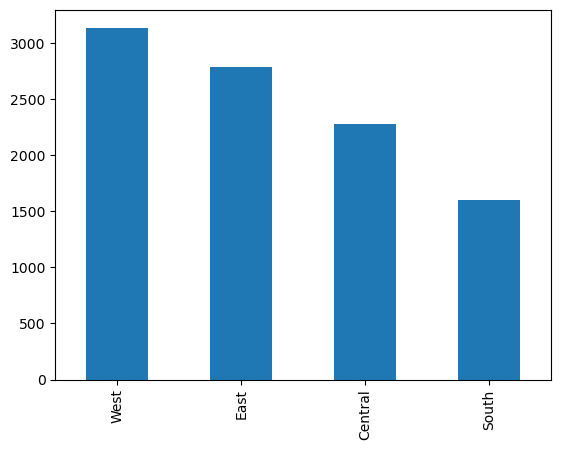

In [30]:
print(df['Region'].value_counts())

df['Region'].value_counts().plot(kind='bar')

● Can you identify the top 5 cities with the highest number of orders?

In [31]:
df['City'].value_counts()[:5]

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
Name: City, dtype: int64

##### **Product Categories:**

● How many unique product categories are there?

In [32]:
df['Category'].nunique()

3

● What are the most popular product categories based on sales?

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


<AxesSubplot:>

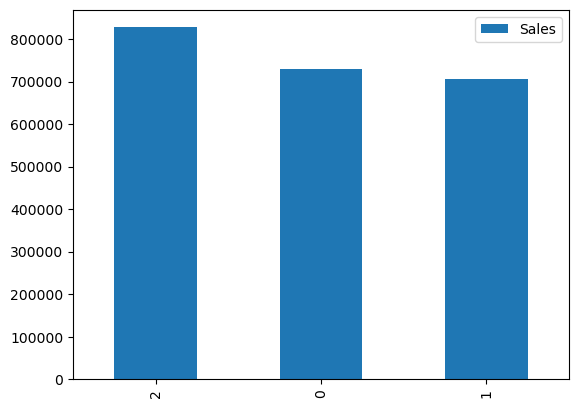

In [33]:
popular_categories = df.groupby(['Category'])['Sales'].sum()
popular_categories = popular_categories.reset_index(name='Sales').sort_values(by='Sales', ascending=False)
print(popular_categories)
popular_categories.plot(kind='bar')

● Can you identify the top 5 selling products?

In [34]:
top_5_products = df.groupby(['Product Name', 'Category'])['Sales'].sum()
top_5_products = top_5_products.reset_index(name='Sales').sort_values(by=['Sales'], ascending=False)
top_5_products.head(5)

,Product Name,Category,Sales
404,Canon imageCLASS 2200 Advanced Copier,Technology,61599.824
649,Fellowes PB500 Electric Punch Plastic Comb Bin...,Office Supplies,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,Technology,22638.480
785,HON 5400 Series Task Chairs for Big and Tall,Furniture,21870.576
685,GBC DocuBind TL300 Electric Binding System,Office Supplies,19823.479


In [35]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Status
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,Delivered
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,Delivered
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,Delivered


##### **Customer Segmentation:**

● How are customers segmented based on the "Segment" column?

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64


<AxesSubplot:>

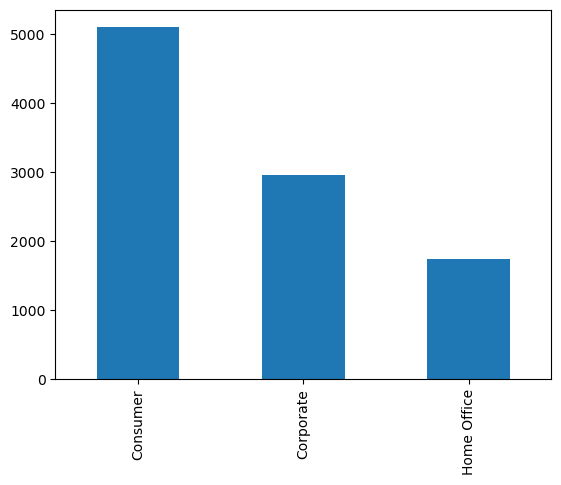

In [36]:
print(df['Segment'].value_counts())
df['Segment'].value_counts().plot(kind='bar')

● What is the average order value for each customer segment

Segment,Consumer,Corporate,Home Office
Sales,225.065777,233.15072,243.403309


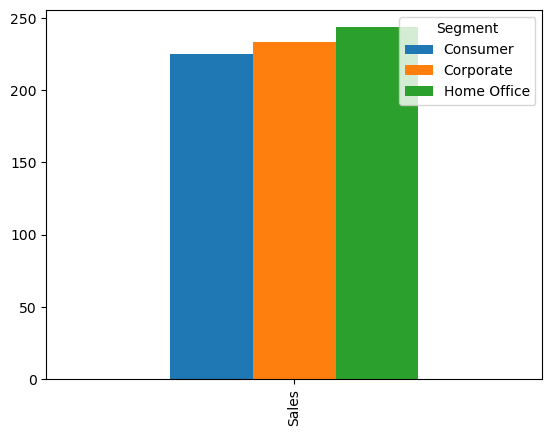

In [37]:
sales_per_segment = pd.pivot_table(data=df,columns='Segment', values='Sales', aggfunc='mean' )
sales_per_segment.plot(kind='bar')
sales_per_segment

##### **Shipping Insights:**

● What are the different shipping modes available?

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

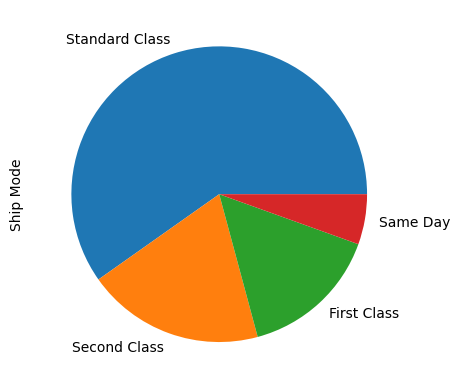

In [38]:
df['Ship Mode'].value_counts().plot(kind='pie')
df['Ship Mode'].value_counts()

● How does the shipping mode relate to the order date and delivery date?

In [39]:
df['Shipment Duration'] = df['Ship Date'] - df['Order Date']

In [40]:
shipping_duration_mean = pd.DataFrame(df.groupby('Ship Mode')['Shipment Duration'].mean())
shipping_duration_mean

,Shipment Duration
Ship Mode,
First Class,6 days 14:16:42.531645569
Same Day,0 days 13:33:40.817843866
Second Class,4 days 16:54:30.662460567
Standard Class,12 days 03:46:51.059907834


● Are there any patterns in shipping modes based on regions?

Ship Mode  First Class  Same Day  Second Class  Standard Class
Region                                                        
Central            292       118           447            1420
East               470       154           521            1640
South              232        83           325             958
West               507       183           609            1841


<AxesSubplot:xlabel='Region'>

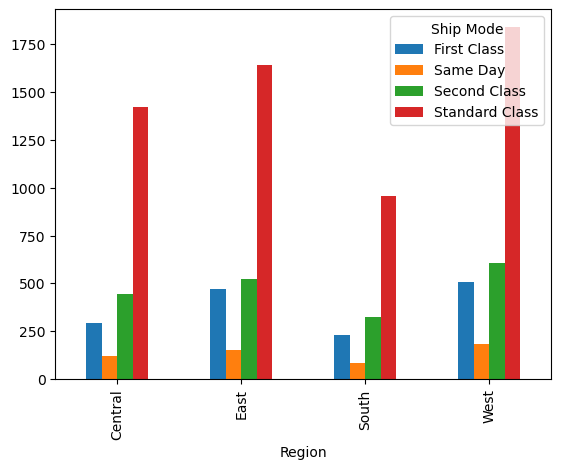

In [41]:
print(pd.pivot_table(data=df, index='Region', columns='Ship Mode', aggfunc='size'))

pd.pivot_table(data=df, index='Region', columns='Ship Mode', aggfunc='size').plot(kind='bar')

##### **Sales Distribution:**

● What is the overall distribution of sales values?

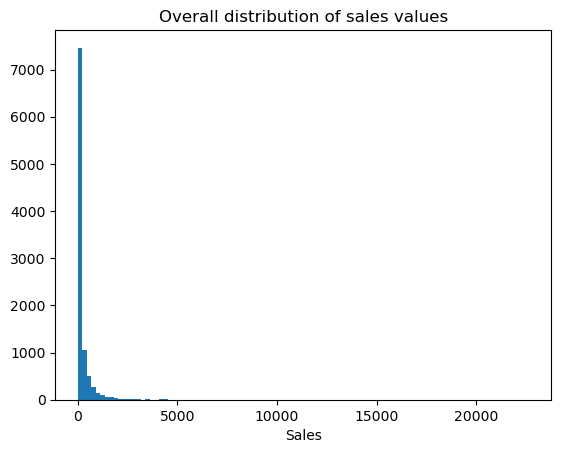

In [42]:
plt.hist(df.Sales, bins=100)
plt.title('Overall distribution of sales values')
plt.xlabel('Sales')
plt.show()

● Are there any outliers in the sales data?

<AxesSubplot:xlabel='Sales'>

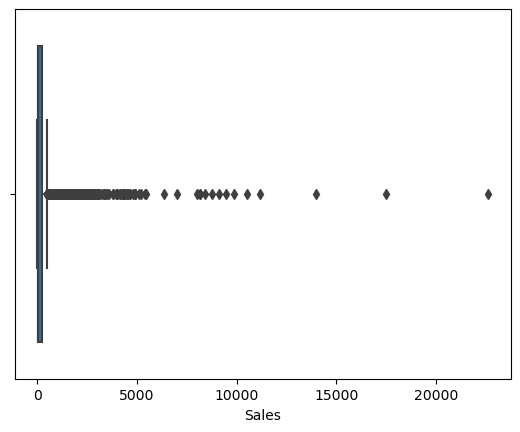

In [43]:
sns.boxplot(df.Sales) # Checking outliers using boxplot

In [44]:
print(f'Five box summary for Sales: ')

Q1 = df['Sales'].quantile(0.25)

Q3 = df['Sales'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

minimum = df['Sales'].min()
maximum = df['Sales'].max()

print(f'''

Q1 score: {Q1},
    ---------------------
Q3 score: {Q3},
    ---------------------
IQR score: {IQR},
    ---------------------
Lower Bound score: {lower_bound},
    ---------------------
Upper Bound score: {upper_bound},
    ---------------------
Minimum Score: {minimum},
    ---------------------
Maximum Score: {maximum}
    
    ''')

Five box summary for Sales: 


Q1 score: 17.248,
    ---------------------
Q3 score: 210.60500000000002,
    ---------------------
IQR score: 193.35700000000003,
    ---------------------
Lower Bound score: -272.7875000000001,
    ---------------------
Upper Bound score: 500.6405000000001,
    ---------------------
Minimum Score: 0.444,
    ---------------------
Maximum Score: 22638.48
    
    


In [45]:
outliers_sales = (df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)

outliers_sales_df = df[outliers_sales]

print('So, we have',outliers_sales_df.Sales.nunique(), 'outliers in our Sales column')

outliers_sales_df.head(5)

So, we have 926 outliers in our Sales column


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Status,Shipment Duration
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Delivered,92 days
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Delivered,-23 days
7,8,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,Delivered,-84 days
10,11,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,Delivered,-84 days
11,12,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002033,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911.4240,Delivered,-84 days


In [46]:
df = df[~outliers_sales] # If you want to remove outliers from the dataset.

<AxesSubplot:xlabel='Sales'>

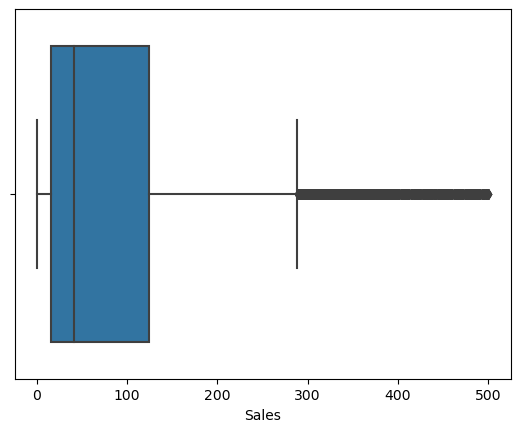

In [47]:
sns.boxplot(df.Sales) # Checking outliers using boxplot after removing them from dataset

● Can you visualize the distribution of sales for each product category?

                       Sales
Category                    
Office Supplies  337978.7500
Furniture        243370.4348
Technology       225412.1850


<AxesSubplot:xlabel='Category'>

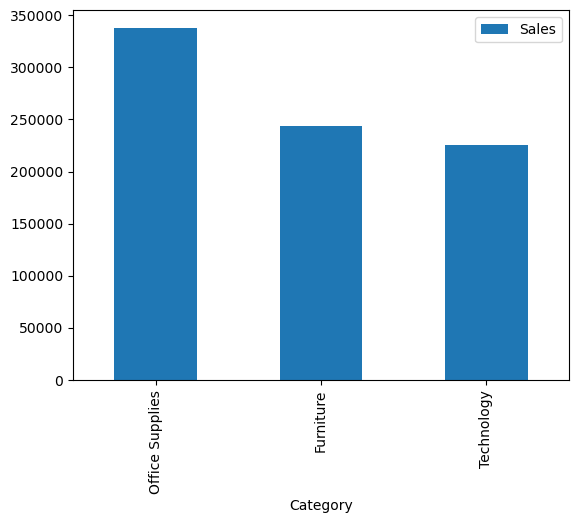

In [48]:
sales_prod = pd.pivot_table(data=df, index='Category', values='Sales', aggfunc='sum').sort_values(by='Sales', ascending=False)
print(sales_prod)
sales_prod.plot(kind='bar')

##### **Profit Analysis:**

● Calculate the total profit for each order.

In [49]:
df['Cost'] = df.Sales - 5

df['Profit'] = df.Sales - df.Cost

Total_profit = pd.pivot_table(data=df, columns='Order ID', values='Profit', aggfunc='sum').T

Total_profit.sort_values(by='Profit', ascending=False)[:10]

,Profit
Order ID,
CA-2018-100111,55.0
US-2017-108504,55.0
CA-2018-157987,55.0
CA-2017-165330,50.0
CA-2018-140949,45.0
CA-2017-105732,45.0
CA-2016-132626,45.0
US-2016-163433,45.0
CA-2016-104346,45.0


● What is the average profit margin?

In [50]:
df['ProfitMargin(%)'] = (df.Profit/df.Sales)*100

df['ProfitMargin(%)'].mean()

28.72393497163526

In [51]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Order Status,Shipment Duration,Cost,Profit,ProfitMargin(%)
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,Delivered,92 days,256.960,5.0,1.908688
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,Delivered,-173 days,9.620,5.0,34.199726
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,Delivered,-23 days,17.368,5.0,22.353362
5,6,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,Delivered,-84 days,43.860,5.0,10.233320
6,7,CA-2015-115812,2015-09-06,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,Delivered,-84 days,2.280,5.0,68.681319


In [52]:
Total_profit = pd.pivot_table(data=df, columns='Order ID', values='ProfitMargin(%)', aggfunc='mean').T

Total_profit = Total_profit.sort_values(by='ProfitMargin(%)', ascending=False)[:10]

Total_profit

,ProfitMargin(%)
Order ID,
CA-2018-124114,899.280576
CA-2017-168361,598.086124
CA-2015-112403,586.854460
US-2015-152723,570.776256
US-2018-100209,462.962963
US-2018-102288,450.131572
CA-2016-146829,449.640288
CA-2015-112718,428.449015
US-2018-162068,420.875421


● Identify the top 5 orders with the highest profit.

In [53]:
total_profit = pd.pivot_table(data=df, columns='Order ID', values='Profit', aggfunc='sum').T
total_profit.sort_values(by='Profit', ascending=False)[:5]

,Profit
Order ID,
CA-2018-100111,55.0
US-2017-108504,55.0
CA-2018-157987,55.0
CA-2017-165330,50.0
CA-2018-140949,45.0


##### **Project Deliverables:**

● Summary of key findings.

* The location with postal code 10035 is notable for having the most product orders in its neighbourhood.

* All of our orders were delivered on time, with no pending orders, and we successfully served 793 clients across the United States.

* Our sales are distributed around the country. Notably, the western section of the country has the most orders (3140), while the southern region has the fewest sales (1598).

* New York has the highest concentration of orders (891), exceeding Los Angeles (728).

* We presently provide three types of products: technology, furniture, and office supplies. Tech products are the most popular.

* People overwhelmingly chose to purchase our product, the 'Canon imageCLASS 2200 Advanced Copier', which sold for approximately $62,000.

* The majority of our clients are simple consumers and cooperatives. Meanwhile, home office has the lowest.

* Most of our orders are sent using our standard class delivery method. Between 2015-01-02 and 2019-05-01, we delivered 5859 orders.

* We typically take two days to deliver first-class orders, three days to deliver second-class items, and five days to deliver standard-class orders. However, we delivered our orders quickly by using the same-day delivery option.

* The majority of the entire distribution of sales values falls between 0 and 10,000.

* We had 926 outilers in the dataset. However, the good news is that we have now eliminated them. 

* We generated the majority of our sales from office supplies, with a total of $337978.

* Specific order IDs, including CA-2018-100111, US-2017-108504, and CA-2018-157987, generated the highest profit of $55.

* Our average profit margin is around 29%, and our highest margin is over 900% from the Order Id CA-2018-124114.



● Any actionable recommendations based on the analysis

We should focus more on the various regions, particularly in the south, because customers are not placing more orders from there. Also, we should push more technology-related products for sale and expand our'same-day' shipping mode capability so that customers can order more of our products. Keeping them engaged leads to greater sales.  These characteristics can significantly assist us increase our sales.

"Thank you for your time. That concludes my presentation for today. I'm hopeful that we may have the opportunity to collaborate in the future. Goodbye!"